In [3]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

In [4]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

In [5]:
%%time
import pandas as pd

df1 = pd.read_excel('part2/output1.xlsx', index_col=0) #1
df2 = pd.read_excel('part2/output2.xlsx', index_col=0) #1
df3 = pd.read_excel('part2/output3.xlsx', index_col=0) #1
df4 = pd.read_excel('part2/output4.xlsx', index_col=0) #1
df5 = pd.read_excel('part2/output5.xlsx', index_col=0) 
df6 = pd.read_excel('part2/output6.xlsx', index_col=0) 
df7 = pd.read_excel('part2/output7.xlsx', index_col=0) 
df8 = pd.read_excel('part2/output8.xlsx', index_col=0) 
df9 = pd.read_excel('part2/output9.xlsx', index_col=0) 
#df10 = pd.read_excel('part2/output10.xlsx', index_col=0) #3
#df11 = pd.read_excel('part2/output11.xlsx', index_col=0) #3
df12 = pd.read_excel('part2/output12.xlsx', index_col=0)
df13 = pd.read_excel('part2/output13.xlsx', index_col=0) 
df14 = pd.read_excel('part2/output14.xlsx', index_col=0) 
df15 = pd.read_excel('part2/output15.xlsx', index_col=0) 
df16 = pd.read_excel('part2/output16.xlsx', index_col=0)
df17 = pd.read_excel('part2/output17.xlsx', index_col=0)
df_out1 = pd.read_excel('part2/output_1+3-1.xlsx', index_col=0) #3
df_out2 = pd.read_excel('part2/output_2+3-1.xlsx', index_col=0) #3

Wall time: 3min 29s


In [6]:
df1_ = pd.read_excel('part2/check1.xlsx', index_col=0) 
df2_ = pd.read_excel('part2/check2.xlsx', index_col=0) 
df3_ = pd.read_excel('part2/check3.xlsx', index_col=0) 

In [129]:
frames = [df1,df4,df5,df6,df7,df8,df9,df12,df13,df14,df15,df16,df17,df_out1,df2,df3,df_out2]
result = pd.concat(frames)

res = [df2,df3,df1_,df2_,df3_]
ress = pd.concat(res)
#ress.to_excel("part2/main_base_fool_validation.xlsx")

In [130]:
#new_y = result[['y+','y-']]
new_y = result['y+']
new_X = result.drop(['y+', 'y-','column25'], axis=1)

In [131]:
# Filling nan with the mean of the column:
#new_X = new_X.fillna(0)

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=seed_value, shuffle = True)
from sklearn.utils import shuffle
new_X = shuffle(new_X)

scale = StandardScaler()
new_X = scale.fit_transform(new_X)

new_y_ = ress[['y+','y-']]
new_X_ = ress.drop(['y+', 'y-','column25'], axis=1)
new_X_ = scale.fit_transform(new_X_)

In [145]:
import tensorflow

inputs = Input(shape=new_X.shape[1])
outputs = Dense(100000, activation='tanh')(inputs)
#layer = tensorflow.keras.layers.Dropout(.2)
#outputs = layer(outputs, training=True)
#outputs = Dense(1000, activation='tanh')(outputs)
#outputs = Dense(1000, activation='tanh')(outputs)
outputs = Dense(1, activation='tanh')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 24)]              0         
                                                                 
 dense_68 (Dense)            (None, 100000)            2500000   
                                                                 
 dense_69 (Dense)            (None, 1)                 100001    
                                                                 
Total params: 2,600,001
Trainable params: 2,600,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size = 10000, epochs=1, verbose=1)

In [67]:
#0.6456

Train MAE      97945.41001319885
Validation MAE 97823.6436843872


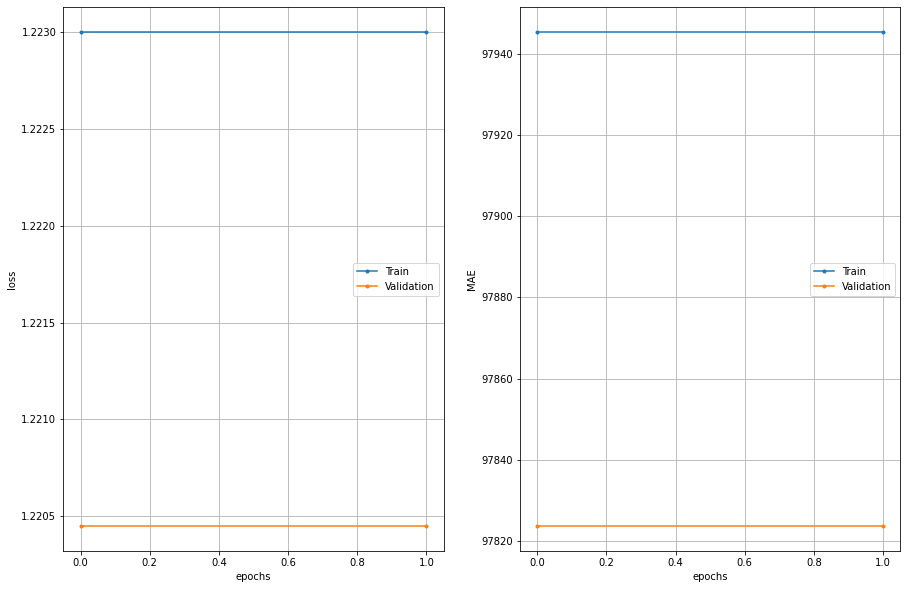

In [138]:
plot_history(history)

In [139]:
new_y_ = ress['y+'] #ress[['y+','y-']]
new_X_ = ress.drop(['y+', 'y-','column25'], axis=1)

In [140]:
ans = model.predict(new_X_)

In [141]:
new_y_

0        1
1        1
2        1
3        1
4        1
        ..
31855    3
31856    3
31857    3
31858    3
31859    3
Name: y+, Length: 141174, dtype: int64

In [142]:
ans

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)